Работа с NumPy

In [1]:
import numpy as np

matrix = np.array([[4, 5, 0], [9, 9, 9]])
print("matrix = \n", matrix, "\n")

tmatrix = matrix.T
print("tmatrix = \n", tmatrix, "\n")

vector = np.ravel(matrix)
print("vector = \n", vector, "\n")

tvector = np.reshape(vector, (6, 1))
print("tvector = \n", tvector, "\n")

list_matrix = list(matrix)
print("list_matrix = \n", list_matrix, "\n")

str_matrix = str(matrix)
print("matrix as str = \n", str_matrix, "\n")

print("matrix type is", type(matrix), "\n")

print("vector type is", type(vector), "\n")

print("list_matrix type is", type(list_matrix), "\n")

print("str_matrix type is", type(str_matrix), "\n")

formatted_vector = "; ".join(map(str, vector))
print("formatted_vector = \n", formatted_vector, "\n")

matrix = 
 [[4 5 0]
 [9 9 9]] 

tmatrix = 
 [[4 9]
 [5 9]
 [0 9]] 

vector = 
 [4 5 0 9 9 9] 

tvector = 
 [[4]
 [5]
 [0]
 [9]
 [9]
 [9]] 

list_matrix = 
 [array([4, 5, 0]), array([9, 9, 9])] 

matrix as str = 
 [[4 5 0]
 [9 9 9]] 

matrix type is <class 'numpy.ndarray'> 

vector type is <class 'numpy.ndarray'> 

list_matrix type is <class 'list'> 

str_matrix type is <class 'str'> 

formatted_vector = 
 4; 5; 0; 9; 9; 9 



Работа с Pandas DataFrame

https://pandas.pydata.org/docs/user_guide/10min.html

Работа с данными - чтение и запись CSV

In [2]:
import pandas as pd

df = pd.read_csv("data/world-population-by-country-2020.csv", index_col="no")

df.to_csv("test.csv")

Работа с данными - основные команды

In [3]:
# df.info()

# print(df.describe().transpose())

from click import clear


cleared_df = df.drop(
    df.columns.difference([
        "Country (or dependency)", "Population 2020", "Yearly Change", "Net Change"
    ]
    ),
    axis=1,
)
# print(cleared_df.head())
# print(cleared_df.tail())
cleared_df['Population 2020'] = cleared_df['Population 2020'].apply(
    lambda x: int("".join(x.split(",")))
)
cleared_df["Net Change"] = cleared_df["Net Change"].apply(
    lambda x: int("".join(x.split(",")))
)
cleared_df["Yearly Change"] = cleared_df["Yearly Change"].apply(
    lambda x: float("".join(x.rstrip('%')))
)

sorted_df = cleared_df.sort_values(
    ["Population 2020", "Net Change", "Country (or dependency)"], ascending=[False, False, True]
)
print(sorted_df.head())
print(sorted_df.tail())

   Country (or dependency)  Population 2020  Yearly Change  Net Change
no                                                                    
1                    China       1439323776           0.39     5540090
2                    India       1380004385           0.99    13586631
3            United States        331002651           0.59     1937734
4                Indonesia        273523615           1.07     2898047
5                 Pakistan        220892340           2.00     4327022
    Country (or dependency)  Population 2020  Yearly Change  Net Change
no                                                                     
231              Montserrat             4992           0.06           3
232        Falkland Islands             3480           3.05         103
233                    Niue             1626           0.68          11
234                 Tokelau             1357           1.27          17
235                Holy See              801           0.25           2

Работа с данными - работа с элементами

In [4]:
print(df["Country (or dependency)"])

print(df.loc[100])

print(df.loc[100, "Country (or dependency)"])

print(df.loc[100:200, ["Country (or dependency)", "Population 2020"]])

print(df[0:3])

print(df.iloc[0])

print(df.iloc[2:5, 0:2])

print(df.iloc[[3, 4], [0, 2]])

no
1                 China
2                 India
3         United States
4             Indonesia
5              Pakistan
             ...       
231          Montserrat
232    Falkland Islands
233                Niue
234             Tokelau
235            Holy See
Name: Country (or dependency), Length: 235, dtype: object
Country (or dependency)       Israel
Population 2020            8,655,535
Yearly Change                  1.60%
Net Change                   136,158
Density  (P/Km²)                 400
Land Area (Km²)               21,640
Migrants (net)                10,000
Fert. Rate                         3
Med. Age                          30
Urban Pop %                      93%
World Share                    0.11%
Name: 100, dtype: object
Israel
      Country (or dependency) Population 2020
no                                           
100                    Israel       8,655,535
101               Switzerland       8,654,622
102                      Togo       8,278,724
103   

Работа с данными - отбор и группировка

In [5]:
# s_values = df["Sex"].unique()
# print(s_values)
df2 = pd.read_csv(
    "data/countries-continents-capitals.csv", index_col="Country/Territory",
    encoding = "ISO-8859-1"
)


# for s_value in s_values:


#     count = df[df["Sex"] == s_value].shape[0]


#     s_total += count


#     print(s_value, "count =", count)


# print("Total count = ", s_total)

extended_df = cleared_df.set_index("Country (or dependency)").join(
    df2
)
print(extended_df)


# print(extended_df.groupby(["Continent"]).agg({"population" : ["sum"]}))

                         Population 2020  Yearly Change  Net Change  \
Country (or dependency)                                               
China                         1439323776           0.39     5540090   
India                         1380004385           0.99    13586631   
United States                  331002651           0.59     1937734   
Indonesia                      273523615           1.07     2898047   
Pakistan                       220892340           2.00     4327022   
...                                  ...            ...         ...   
Montserrat                          4992           0.06           3   
Falkland Islands                    3480           3.05         103   
Niue                                1626           0.68          11   
Tokelau                             1357           1.27          17   
Holy See                             801           0.25           2   

                                  Capital      Continent  
Country (or depen

Визуализация - Исходные данные

In [6]:
data = extended_df[["Population 2020", "Yearly Change", "Continent"]].copy()
data.dropna(subset=["Population 2020"], inplace=True)
print(data)

                         Population 2020  Yearly Change      Continent
Country (or dependency)                                               
China                         1439323776           0.39           Asia
India                         1380004385           0.99           Asia
United States                  331002651           0.59  North America
Indonesia                      273523615           1.07           Asia
Pakistan                       220892340           2.00           Asia
...                                  ...            ...            ...
Montserrat                          4992           0.06  North America
Falkland Islands                    3480           3.05  South America
Niue                                1626           0.68        Oceania
Tokelau                             1357           1.27        Oceania
Holy See                             801           0.25            NaN

[235 rows x 3 columns]


Визуализация - Сводка пяти чисел

<img src="assets/quantile.png" width="400" style="background-color: white">

              Population 2020                                      \
                          min          q1          q2      median   
Continent                                                           
Africa                  98347  2509845.75  13042506.5  13042506.5   
Asia                   437479  5985985.50  18138682.5  18138682.5   
Europe                  33691  1326535.00   5459642.0   5459642.0   
North America            4992    67288.00    395436.0    395436.0   
Oceania                  1357    27368.25    144112.0    144112.0   
South America            3480  1458346.50  14658037.5  14658037.5   

                                        
                        q3         max  
Continent                               
Africa         31118563.75   206139589  
Asia           52054338.75  1439323776  
Europe         10423054.00   145934462  
North America   6589966.75   331002651  
Oceania          488471.75    25499884  
South America  31837875.50   212559417  
         

<Axes: title={'center': 'Population 2020'}, xlabel='Continent'>

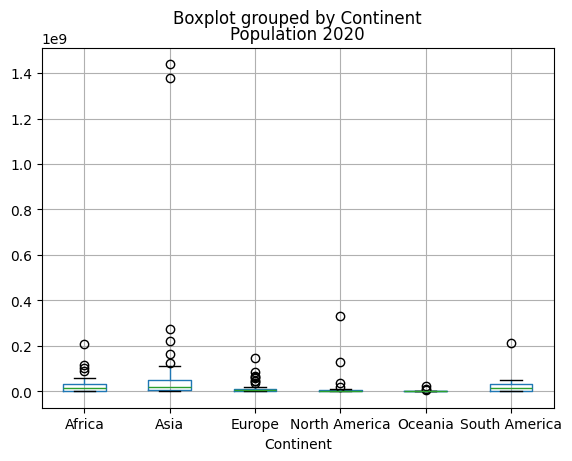

In [7]:
def q1(x):
    return x.quantile(0.25)


# median = quantile(0.5)
def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)


def iqr(x):
    return q3(x) - q1(x)


def low_iqr(x):
    return max(0, q1(x) - 1.5 * iqr(x))


def high_iqr(x):
    return q3(x) + 1.5 * iqr(x)


quantiles = (
    data[["Continent", "Population 2020"]]
    .groupby(["Continent"])
    .aggregate(["min", q1, q2, "median", q3, "max"])
)
print(quantiles)

iqrs = (
    data[["Continent", "Population 2020"]]
    .groupby(["Continent"])
    .aggregate([low_iqr, iqr, high_iqr])
)
print(iqrs)

data.boxplot(column="Population 2020", by="Continent")

Визуализация - Гистограмма

<Axes: ylabel='Frequency'>

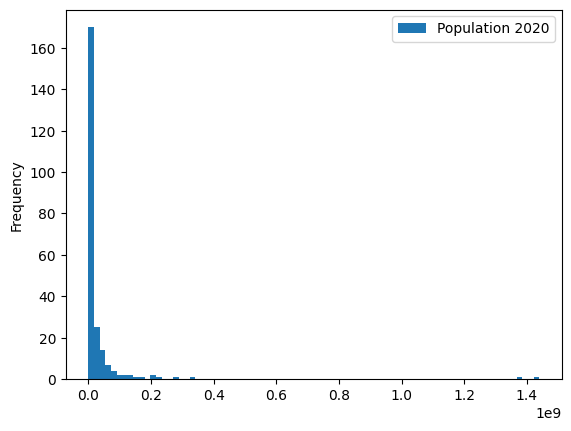

In [8]:
data.plot.hist(column=["Population 2020"], bins=80)

Визуализация - Точечная диаграмма

    Country (or dependency)  Population 2020  Yearly Change  Net Change
no                                                                     
1                     China       1439323776           0.39     5540090
2                     India       1380004385           0.99    13586631
3             United States        331002651           0.59     1937734
4                 Indonesia        273523615           1.07     2898047
5                  Pakistan        220892340           2.00     4327022
..                      ...              ...            ...         ...
231              Montserrat             4992           0.06           3
232        Falkland Islands             3480           3.05         103
233                    Niue             1626           0.68          11
234                 Tokelau             1357           1.27          17
235                Holy See              801           0.25           2

[235 rows x 4 columns]


<Axes: xlabel='Country (or dependency)', ylabel='Population 2020'>

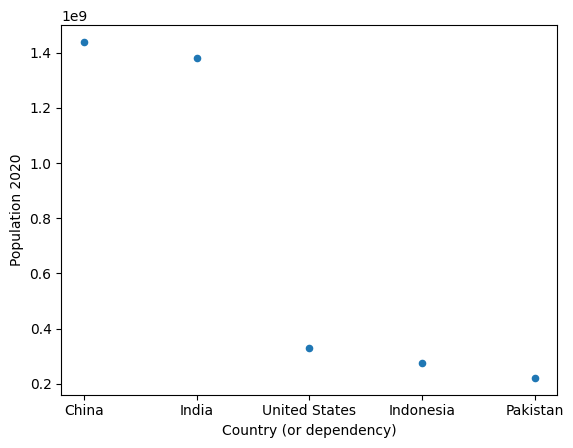

In [9]:
print(cleared_df)
cleared_df.head(5).plot.scatter(x="Country (or dependency)", y="Population 2020")

Визуализация - Столбчатая диаграмма

In [10]:
# plot = data.groupby(["Pclass", "Survived"]).size().unstack().plot.bar(color=["pink", "green"])
# plot.legend(["Not survived", "Survived"])

Визуализация - Временные ряды

   Year     Population Yearly %      Yearly  Median  Fertility  Density
0  2020  7,794,798,739    1.10%  83,000,320      31       2.47       52
1  2025  8,184,437,460    0.98%  77,927,744      32       2.54       55
2  2030  8,548,487,400    0.87%  72,809,988      33       2.62       57
3  2035  8,887,524,213    0.78%  67,807,363      34       2.70       60
4  2040  9,198,847,240    0.69%  62,264,605      35       2.77       62
5  2045  9,481,803,274    0.61%  56,591,207      35       2.85       64
6  2050  9,735,033,990    0.53%  50,646,143      36       2.95       65
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        7 non-null      int64  
 1   Population  7 non-null      object 
 2   Yearly %    7 non-null      object 
 3   Yearly      7 non-null      object 
 4   Median      7 non-null      int64  
 5   Fertility   7 non-null      floa

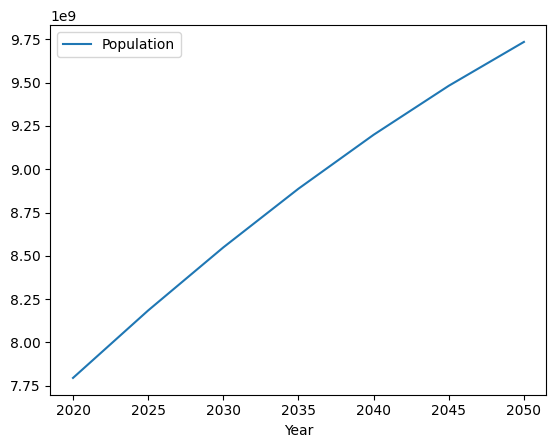

In [11]:
from datetime import datetime
import matplotlib.dates as md

ts = pd.read_csv("data/world-population-forcast-2020-2050.csv", encoding="ISO-8859-1")
print(ts)
ts.iloc[:, 1] = ts.iloc[:, 1].apply(lambda row: int("".join(str(row).split(","))))
ts.info()

print(ts.columns.values)
plot = ts.plot.line(x="Year", y="Population")